# PCA (Análisis de componentes principales)

Es un metodo para para describir un conjunto de datos en términos de nuevas variables no correlacionadas.

PCA es una tecnica de extracción de caracteristicas, combina nuestras variables de una manera especifica para que se puedan eliminar las variables "menos importantes", la ventaja de PCA es que las "nuevas" variables son independientes una de la otra.

Estas nuevas variables independientes son una combinación de las variables que teniamos originalmente.

**WRAP UP:**
La idea de utilizar PCA es simple, reducir el número de variables mientras preservamos la mayor cantidad de información



###  ¿Como funciona PCA?
* Estandarizar los datos
* Obtener los vectores de Eigen y los valores de Eigen de la matriz de correlación
* Ordenar los valores de Eigen de manera descendente y elegir los **k** vectores de eigen que correspondan a la **k** con mayores valores de eigen donde **k** es el número de dimensiones de nuestro nuevo set de datos.
* Construir la matriz de proyección **W** de los **k** vectores de eigen seleccionados
* Transformar el dataset original con la matriz **W** para obtener un nuevo data set con **k** dimensiones


*ventajas: Ya existe una implementación de PCA en scikit-learn que hace estos pasos.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


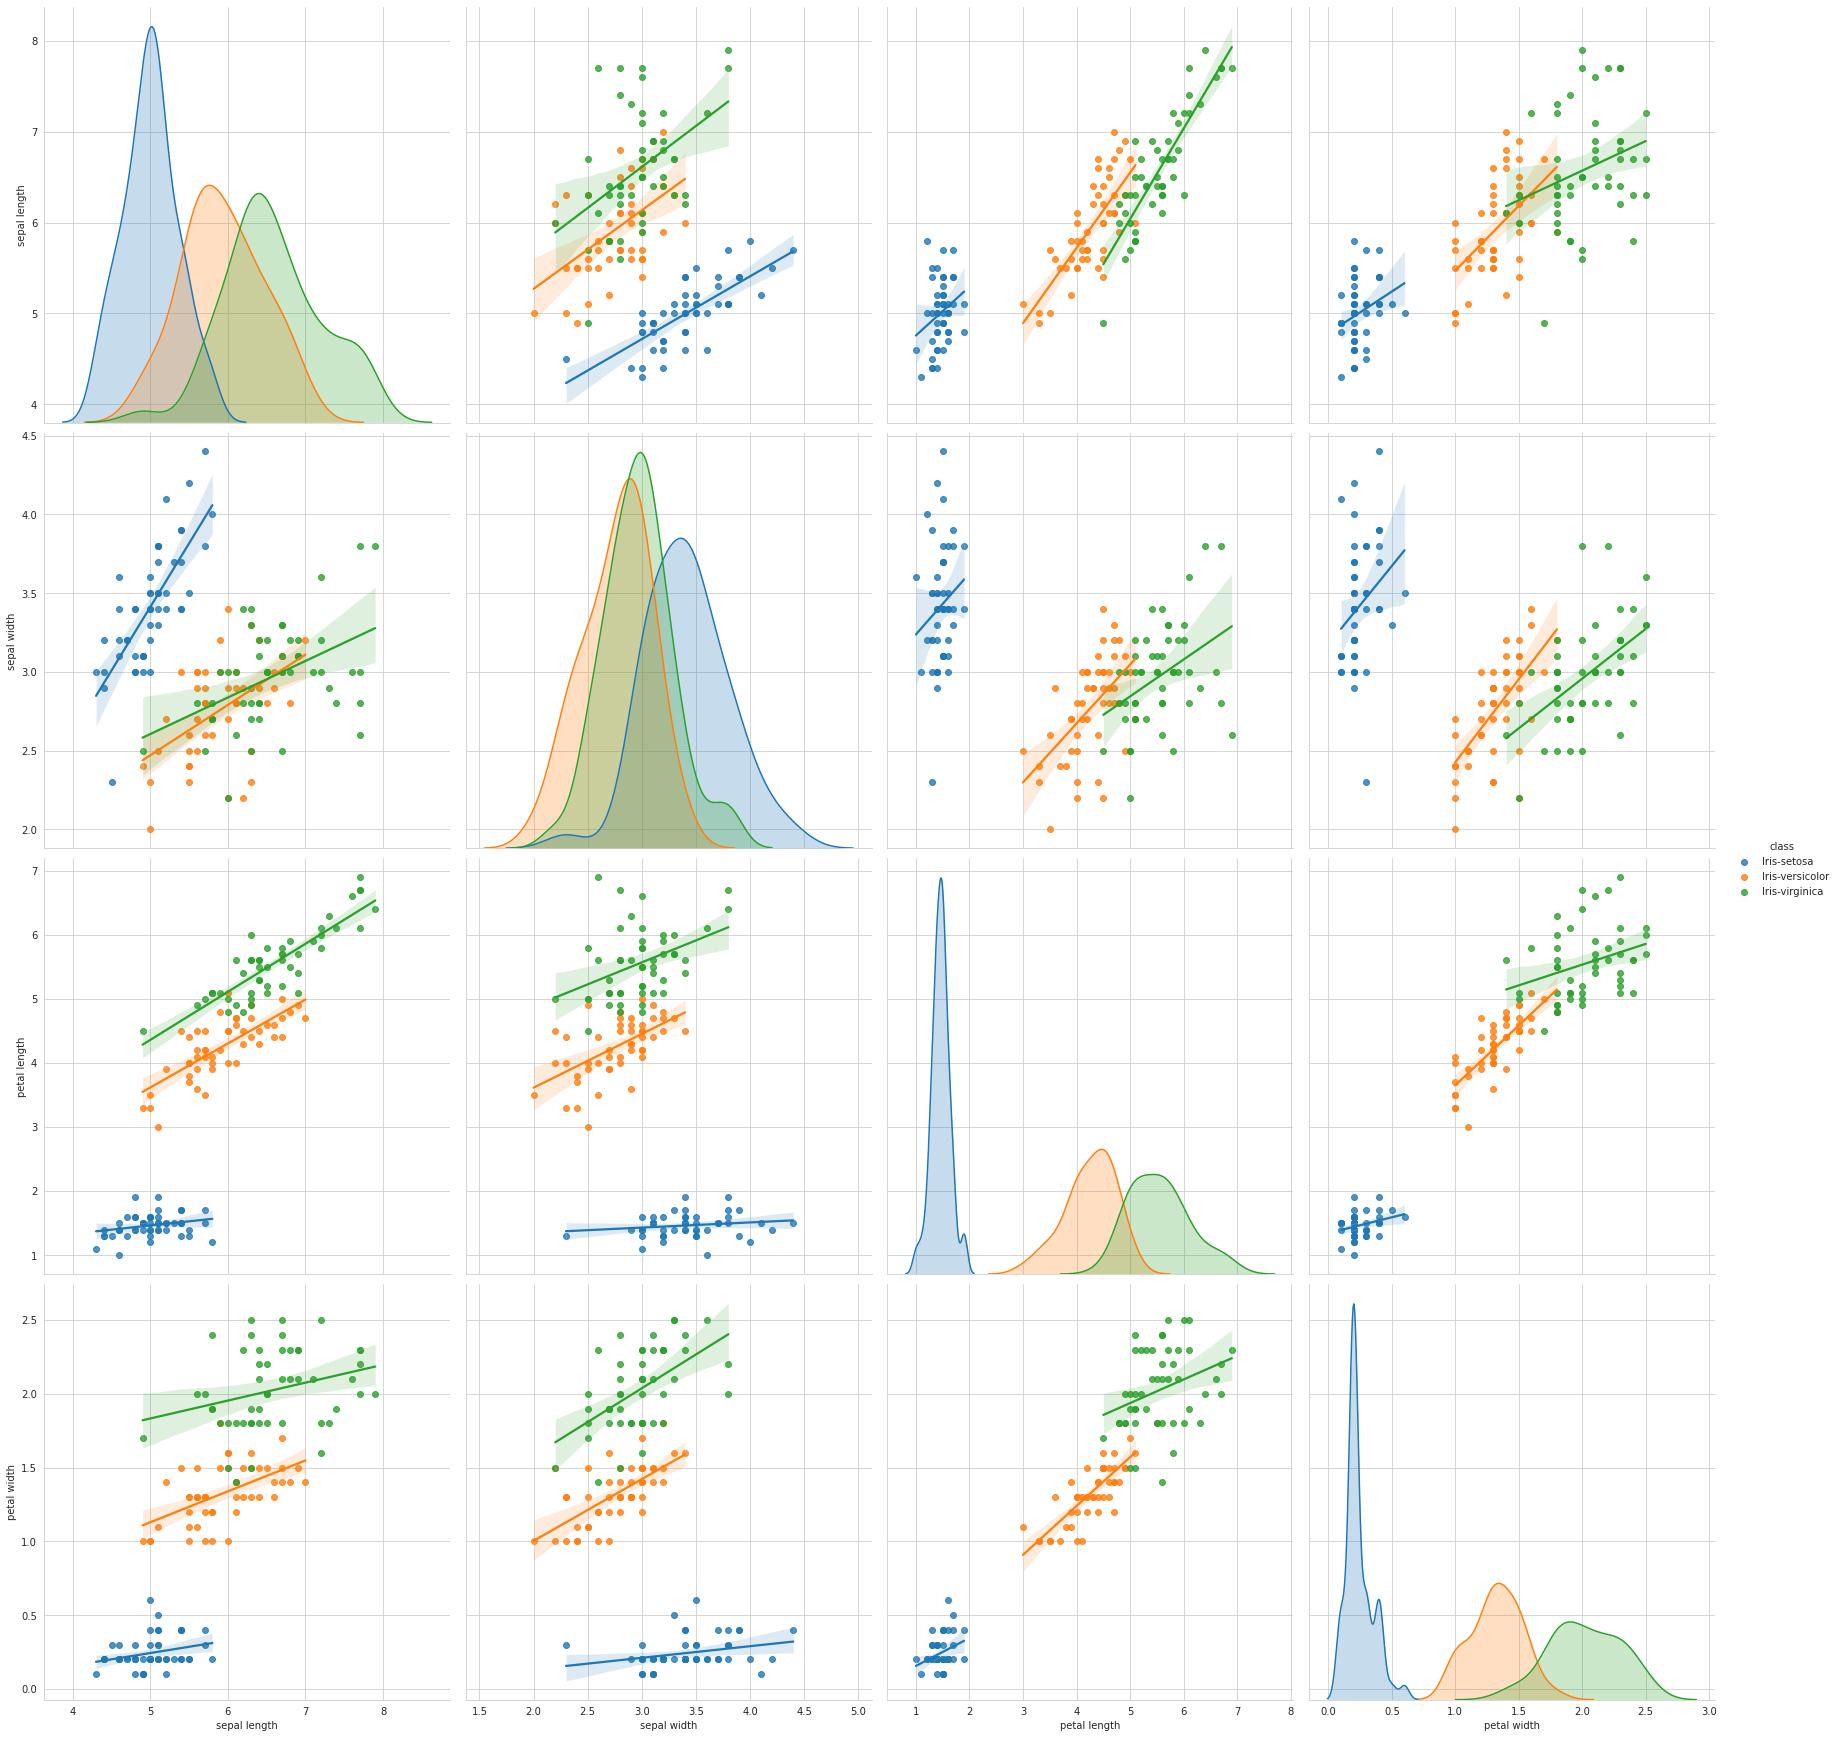

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")

sns.pairplot(df, hue="class", size=6, kind="reg")

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values # Separando las variables
types = df['class']

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


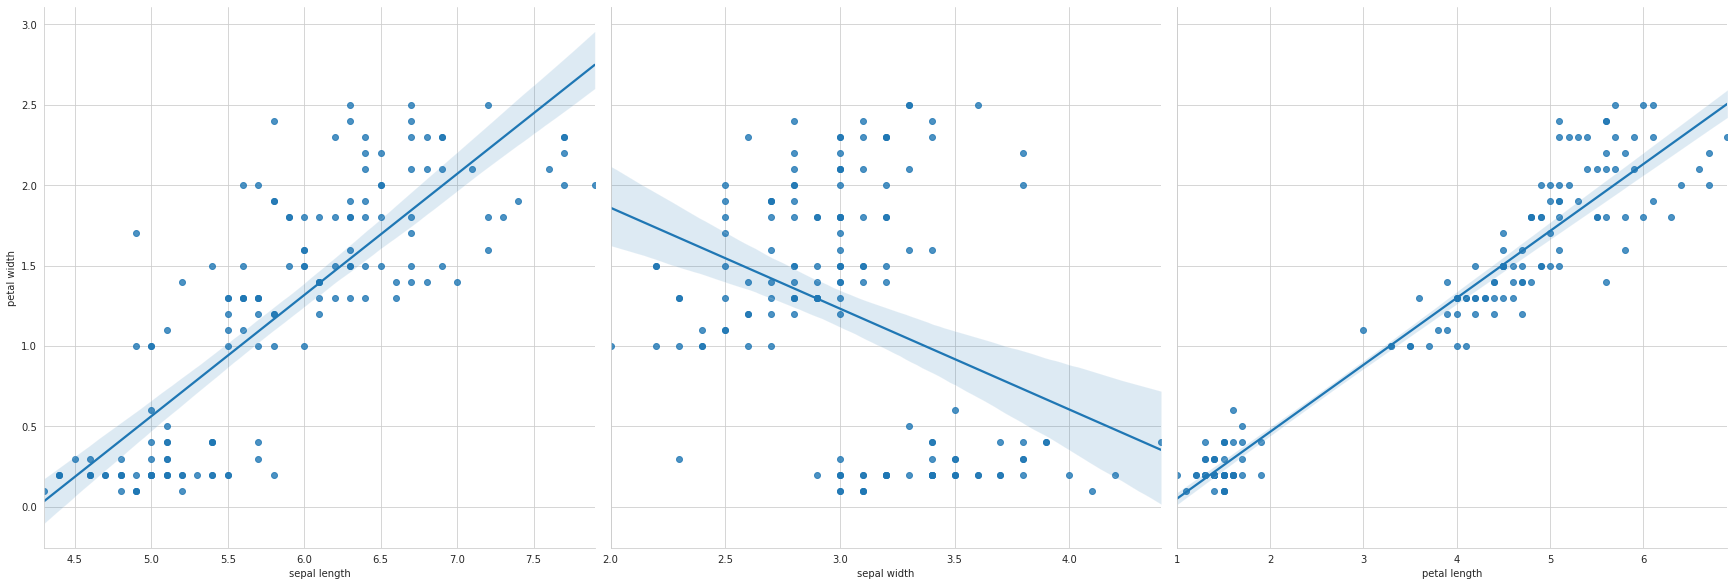

In [ ]:
sns.pairplot(df.loc[:"class"], x_vars=features[:-1], y_vars =features[-1], kind="reg", size=8)

In [ ]:
x = StandardScaler().fit_transform(x) #Estandarizando las variables
x[0:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

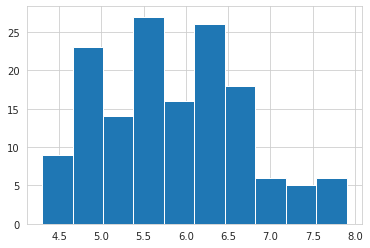

In [ ]:
plt.hist(df['sepal length'])

(array([ 9., 23., 14., 27., 22., 20., 18.,  6.,  5.,  6.]),
 array([-1.87002413, -1.4338198 , -0.99761547, -0.56141113, -0.1252068 ,
         0.31099753,  0.74720187,  1.1834062 ,  1.61961053,  2.05581487,
         2.4920192 ]),
 <a list of 10 Patch objects>)

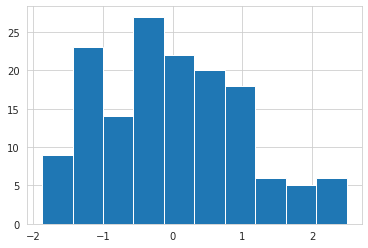

In [ ]:
plt.hist(x[:,0])

(array([ 4.,  7., 22., 24., 51., 18.,  9., 11.,  2.,  2.]),
 array([-2.43898725, -1.88362014, -1.32825302, -0.7728859 , -0.21751879,
         0.33784833,  0.89321545,  1.44858256,  2.00394968,  2.55931679,
         3.11468391]),
 <a list of 10 Patch objects>)

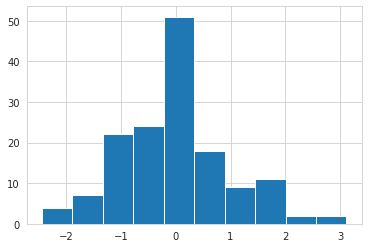

In [ ]:
plt.hist(x[:,1])

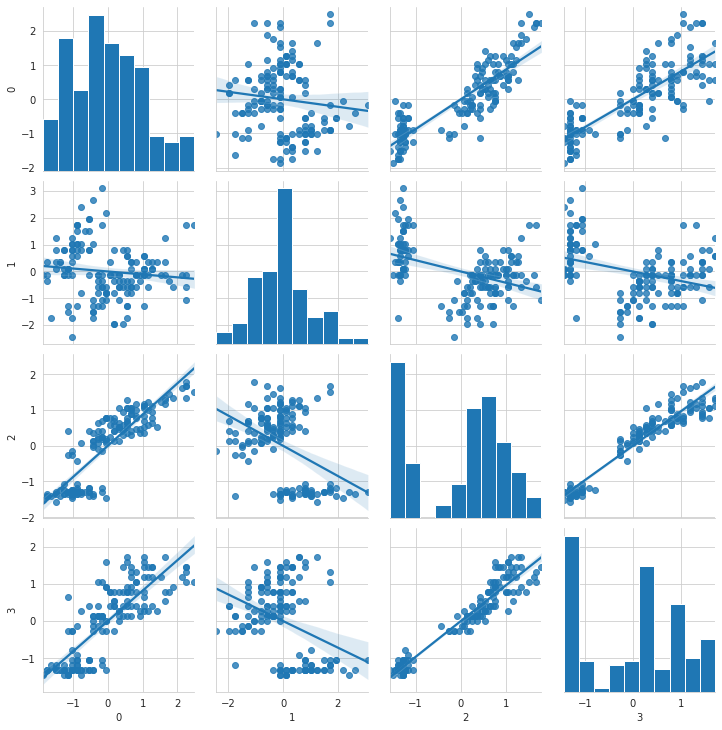

In [ ]:
x_norm = pd.DataFrame(x)
sns.pairplot(x_norm, kind='reg')

In [ ]:
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)
principalComponents[0:10]

array([[-2.26454173,  0.5057039 , -0.12194335, -0.02307332],
       [-2.0864255 , -0.65540473, -0.22725083, -0.10320824],
       [-2.36795045, -0.31847731,  0.05147962, -0.02782523],
       [-2.30419716, -0.57536771,  0.09886044,  0.06631146],
       [-2.38877749,  0.6747674 ,  0.02142785,  0.03739729],
       [-2.07053681,  1.51854856,  0.03068426, -0.00439877],
       [-2.44571134,  0.07456268,  0.34219764,  0.03809657],
       [-2.23384186,  0.24761393, -0.08257446,  0.02550516],
       [-2.34195768, -1.09514636,  0.1535624 ,  0.02679383],
       [-2.18867576, -0.44862905, -0.24655952,  0.0399073 ]])

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalComponents[0:10]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ],
       [-2.07053681,  1.51854856],
       [-2.44571134,  0.07456268],
       [-2.23384186,  0.24761393],
       [-2.34195768, -1.09514636],
       [-2.18867576, -0.44862905]])

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


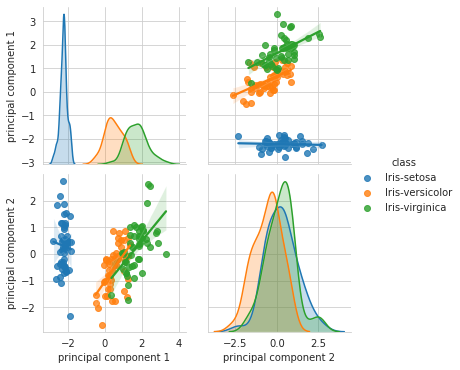

In [ ]:
sns.pairplot(finalDf, hue='class', kind='reg')

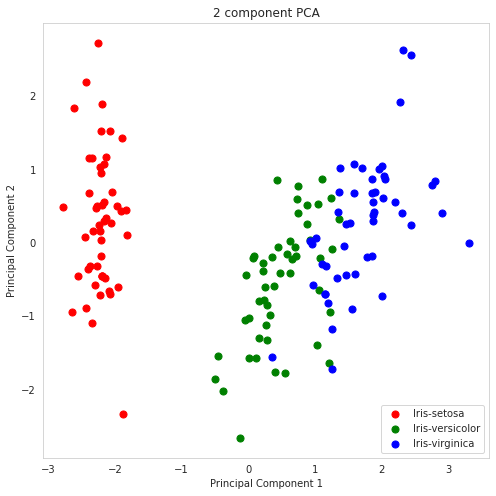

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')
types = finalDf['class'].unique().tolist()
colors = ['r', 'g', 'b']

for target, color in zip(types,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               ,finalDf.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(types)
ax.grid()

# De manera manual

In [ ]:
#Estandarizando los datos
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values # Separando las variables
x = StandardScaler().fit_transform(x) #Estandarizando las variables

In [ ]:
x.shape

(150, 4)

Calculando la matriz de covarianza

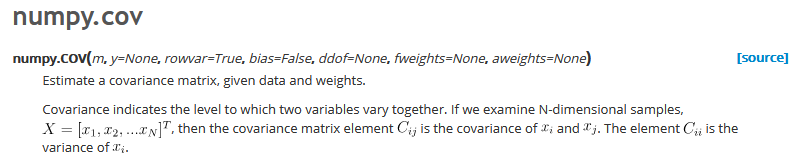

In [ ]:
#Calculando la matriz de covarianza
cov_mat = np.cov(x.T)
cov_mat[0:10]

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
#Obtenemos los vectores y valores de eigen de la matriz de covarianza
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [ ]:
eig_vecs[:,0]

array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])

In [ ]:
eig_vals

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [ ]:
#Explicando la varianza de los valores de eigen para determinar cuantos componentes usaremos
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

In [ ]:
var_exp

[72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]

In [ ]:
#Haciendo la matriz de proyección con los dos valores de eigen que contienen mayor % de varianza
matrix_w = np.hstack((eig_vecs[:,0].reshape(4,1),
                      eig_vecs[:,1].reshape(4,1)))

matrix_w

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

Utilizando la matriz de proyección para obtener nuestras nuevas variables.

La formula es:

$Y = $X $\cdot$ $W$

In [ ]:
Y = x.dot(matrix_w)
Y[0:10]

array([[-2.26454173, -0.5057039 ],
       [-2.0864255 ,  0.65540473],
       [-2.36795045,  0.31847731],
       [-2.30419716,  0.57536771],
       [-2.38877749, -0.6747674 ],
       [-2.07053681, -1.51854856],
       [-2.44571134, -0.07456268],
       [-2.23384186, -0.24761393],
       [-2.34195768,  1.09514636],
       [-2.18867576,  0.44862905]])

In [ ]:
dfy_manual = pd.DataFrame(Y, columns=['principal component 1', 'principal component 2'])
dfy_manual['class'] = finalDf['class']
dfy_manual.head()

,principal component 1,principal component 2,class
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


In [ ]:
finalDf.head()

,principal component 1,principal component 2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


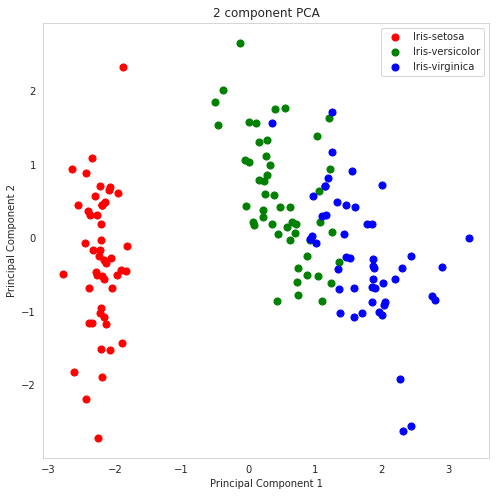

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')
types = finalDf['class'].unique().tolist()
colors = ['r', 'g', 'b']

for target, color in zip(types,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(dfy_manual.loc[indicesToKeep, 'principal component 1']
               ,dfy_manual.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(types)
ax.grid()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = finalDf[['principal component 1', 'principal component 2']]
Y = df['sepal width']

In [ ]:
X.shape

(150, 2)

In [ ]:
Y.shape

(150,)

In [ ]:
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Intercept:", lr.intercept_)
print("Coeficientes:", lr.coef_)

Intercept: 3.0540000000000003
Coeficientes: [-0.11380793  0.39997607]


In [ ]:
print("R-Square-value:", lr.score(X,Y)) #La columna petal width ya venia incluida en los componentes principales

R-Square-value: 0.991050504224183
